In [1]:
import glob,os,sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mat
from numpy import *
import re
import scipy.stats as st
from os.path import expanduser
import cmath
import scipy.optimize as op
import time
import gzip
import pandas as pd
%matplotlib inline

In [2]:
def med_med (true,fitted):
    temp = fitted - true
    return (np.median(np.abs(temp-np.median(temp))))

def rms (true,fitted):
    temp = fitted - true
    return np.sqrt((np.sum(temp**2))/len(temp))
    
start = time.time()

home = os.path.expanduser("~")

direc = os.listdir(".")

In [3]:
name = 'alllc_full_info.CSV'  
tempdata = home+'/Desktop/trial_runs/'+str(name)
df = pd.read_csv(tempdata)
df['u0_true'] = np.abs(df['u0_true'])
df['u0_fitted'] = np.abs(df['u0_fitted'])
df['q_fitted'][df['q_fitted']>1] = 1/df['q_fitted'][df['q_fitted']>1]
df['q_fitted_log'][df['q_fitted']>1] = np.log10(1/df['q_fitted'][df['q_fitted']>1])

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [4]:
df['q_rho'] = ( df['q_true'] + df['rho']**2 )

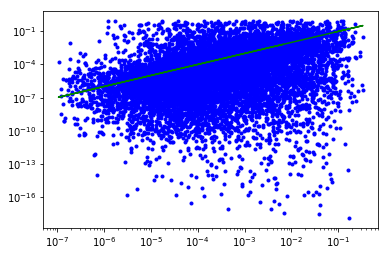

In [5]:
plt.plot(df['q_true'],df['q_fitted'],'b.')
plt.plot(df['q_true'],df['q_true'],'g-')


plt.xscale('log')
plt.yscale('log')

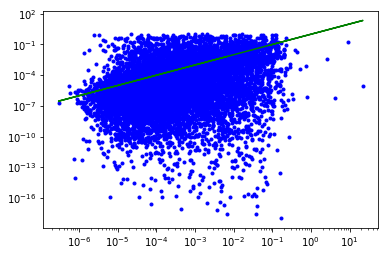

In [6]:
plt.plot(df['q_rho'],df['q_fitted'],'b.')
plt.plot(df['q_rho'],df['q_rho'],'g-')


plt.xscale('log')
plt.yscale('log')

In [7]:
red_chi_2_1 = np.abs(2*df['chi_2_1'])/38316
red_chi_2_2 = np.abs(2*df['chi_2_2'])/38316

In [8]:
print len(df)
#df = df[ (df['chi_2_2']>-25000) & (df['s_fitted']<5) & ((df['f_s_true']*( (2 + df['u0_true']**2) / (df['u0_true']*np.sqrt(4 + df['u0_true']**2)) ) + (1-df['f_s_true']) )>1.1)]
#df = df[(np.abs(df['t0_fitted']-df['tp_fitted'])>1) & ((-2*df['chi_2_2']/41039)>1.003) ]
df_org = df

df = df[(red_chi_2_2<1.25) &((red_chi_2_1-red_chi_2_2)>0.001)]
print (len(df))

13029
7963


In [9]:
df = df[np.abs(df['u0_fitted'])>0.045] #02/20/2018

print(len(df))

6115


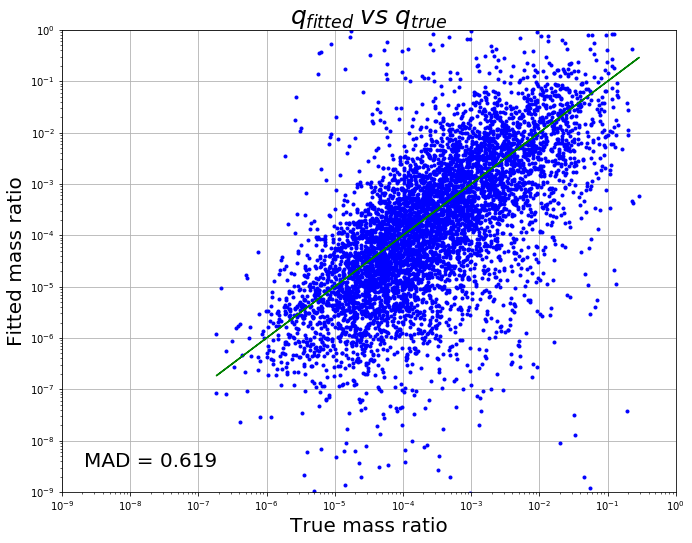

In [39]:
plt.plot(df['q_true'],df['q_fitted'],'b.')
plt.plot(df['q_true'],df['q_true'],'g-')
plt.xlabel('True mass ratio', size=20)
plt.ylabel('Fitted mass ratio', size=20)
plt.title(r'$q_{fitted} \; vs \; q_{true}$', size=25)

plt.xlim(1e-9,1)
plt.ylim(1e-9,1)


plt.xscale('log')
plt.yscale('log')
plt.grid()

plt.text(2e-8, 4e-9, 'MAD = '+str(round(med_med(df['q_true_log'],df['q_fitted_log']),3)), size = 20
        ,horizontalalignment='center', verticalalignment='center')
fig = plt.gcf()
fig.set_size_inches(11,8.5)
fig.savefig(home+'/Desktop/q_vs_q.png')

In [17]:
med_med(df['q_true_log'],df['q_fitted_log'])

0.6187458825900012

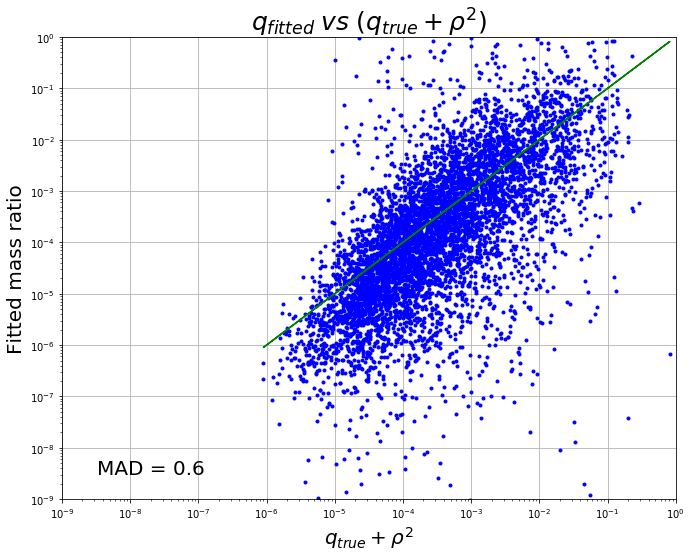

In [40]:
plt.plot(df['q_true']+df['rho']**2,df['q_fitted'],'b.')
plt.plot(df['q_true']+df['rho']**2,df['q_true']+df['rho']**2,'g-')

plt.xlabel(r'$q_{true}+{\rho}^2$', size=20)
plt.ylabel('Fitted mass ratio', size=20)
plt.title(r'$q_{fitted} \; vs \; (q_{true}+{\rho}^2)$', size=25)

plt.xlim(1e-9,1)
plt.ylim(1e-9,1)


plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.text(2e-8, 4e-9, 'MAD = '+str(round(med_med(np.log10(df['q_rho']),df['q_fitted_log']),3)), size = 20
        ,horizontalalignment='center', verticalalignment='center')
fig = plt.gcf()
fig.set_size_inches(11,8.5)
fig.savefig(home+'/Desktop/q_vs_q_plus_rho.png')

In [16]:
med_med(np.log10(df['q_rho']),df['q_fitted_log'])

0.6002435125217107

In [24]:
sigma = np.std(df['q_true_log']-df['q_fitted_log'])
sigma2 = 1.5

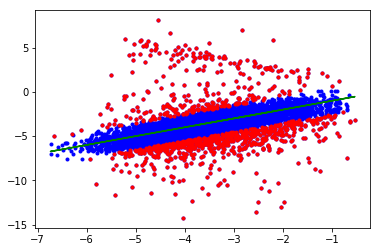

In [28]:
plt.plot(df['q_true_log'],df['q_fitted_log'],'b.')
plt.plot(df['q_true_log'],df['q_true_log'],'g-')
plt.plot(df['q_true_log'][(df['q_fitted_log']>df['q_true_log']+sigma2) | (df['q_fitted_log']<df['q_true_log']-sigma2)]
        ,df['q_fitted_log'][(df['q_fitted_log']>df['q_true_log']+sigma2) | (df['q_fitted_log']<df['q_true_log']-sigma2)],'r.')

# plt.xscale('log')
# plt.yscale('log')

In [30]:
df_q_scatter = df[(df['q_fitted_log']>df['q_true_log']+sigma2) | (df['q_fitted_log']<df['q_true_log']-sigma2)]

(0, 5)

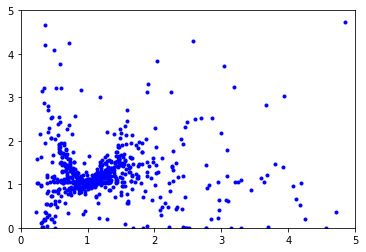

In [32]:
plt.plot(df_q_scatter['s_true'], df_q_scatter['s_fitted'],'b.')
plt.xlim(0,5)
plt.ylim(0,5)

In [43]:
%matplotlib qt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib
import matplotlib.pyplot as plt




x= df_q_scatter['s_true']
y= df_q_scatter['s_fitted']
z=2 * np.abs(df_q_scatter['chi_2_1'])
df_n=pd.DataFrame(data={'A':x,'B':y,'C':z})

points = plt.scatter(df_n.A, df_n.B, c=df_n.C,cmap="jet", lw=0,norm=matplotlib.colors.LogNorm(vmin=df_n.C.min(), vmax=200000))
plt.colorbar(points)
plt.xlim(0,5)
plt.ylim(0,5)
#sns.lmplot('A', 'B', data=df_n, hue='C', fit_reg=False)
print 'done'
#fig = plt.gcf()
#fig.set_size_inches(11,8.5)
#fig.savefig(home+'/Desktop/1.png')
plt.show()

done
